## Fitting drug response curves with sigmoid function

1. Test different fitting function:
2. visualise fitting and analyse errors
3. Make visualisation of absolute and relative methods of estimaton of IC50

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
import os
os.listdir("results")

['filt_auc_limit_02.csv',
 'filt_1234.csv',
 'filt_auc_limit_06.csv',
 'filt_123.csv',
 'filt_auc_limit_04.csv']

## Fitting data

In [3]:
df = pd.read_csv("results/filt_1234.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'dif_first', 'dif_last'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 2600/2600 [00:03<00:00, 700.41it/s]

R2>0: (2565, 32)
R2>0.9 2535
Number of samples with fitting <0.1: 29

CPU times: user 3.72 s, sys: 34.3 ms, total: 3.76 s
Wall time: 3.73 s


## Visual Analysis of fitting efficiency

### All samples

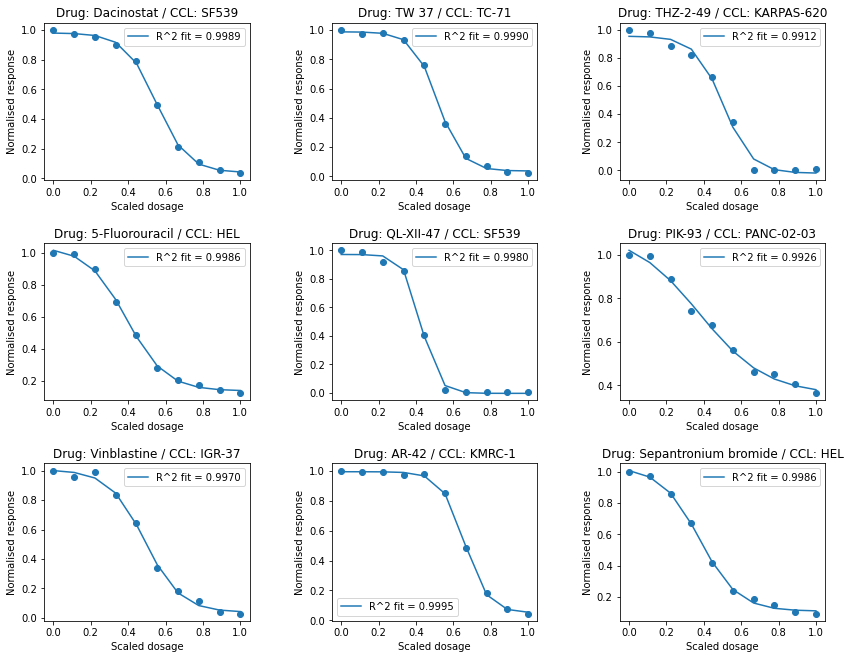

In [5]:
# ShowResponseCurvesWithFitting(df.drop(["drug_name", "CCL_name"],axis=1), plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
#                         indexes=df.index[:9],fitting_function = fitting_function, 
#                                   fitting_parameters =fitting_function)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Bad fitting examples (examination after analysis of predictive models)

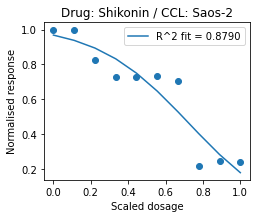

In [6]:
df2= df[(df[fitting_function+"_r2"]>0.1)& (df[fitting_function+"_r2"]<0.9)]

ShowResponseCurvesWithFitting(df2, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes= df2.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Outliers in predictive models

Fitting parameters: [  9.5724958   -9.65402097 -11.75490706   0.34259313]
Predicted parameters: [0.348604, 1.106316, -14.202945, 0.168828]


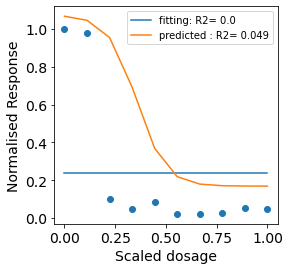

In [7]:
ind = int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters = fitting_function
predicted_param = [0.348604, 1.106316, -14.202945, 0.168828]
save_fig_name = _FOLDER_2+"outlier_coef1_1.png"

ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

Fitting parameters: [ 1.2373539   0.48181959 -1.88612485 -0.75696168]
Predicted parameters: [0.623563, 1.099364, -13.124646, -8.77264e-15]


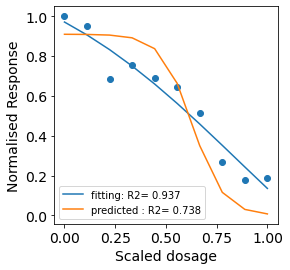

In [8]:
ind =int(df[(df["DRUG_ID"]==173)& (df["COSMIC_ID"]==687777)].index[0])
fitting_parameters =fitting_function
predicted_param = [0.623563, 1.099364, -13.124646, -8.772640e-15]
save_fig_name = _FOLDER_2+"outlier_coef3.png"

ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

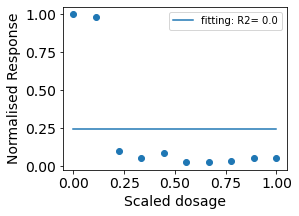

In [9]:
ind =int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"outlier_coef1_2.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

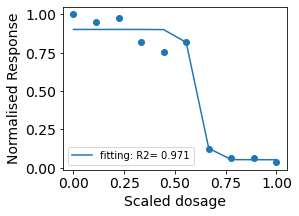

In [10]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

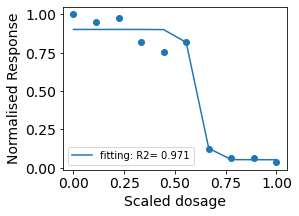

In [11]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters = fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

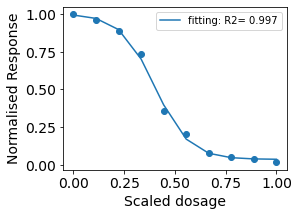

In [12]:
ind =int(df[(df["DRUG_ID"]==274)& (df["COSMIC_ID"]==1240223)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_1.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)


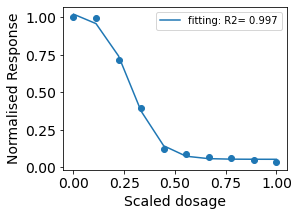

In [13]:
ind =int(df[(df["DRUG_ID"]==135)& (df["COSMIC_ID"]==753610)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_2.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

### sigmoid_2_param

100%|██████████| 2565/2565 [00:02<00:00, 1270.12it/s]


R2>0: (2565, 34)
R2>0.9 2344
CPU times: user 2.17 s, sys: 23.7 ms, total: 2.19 s
Wall time: 2.17 s


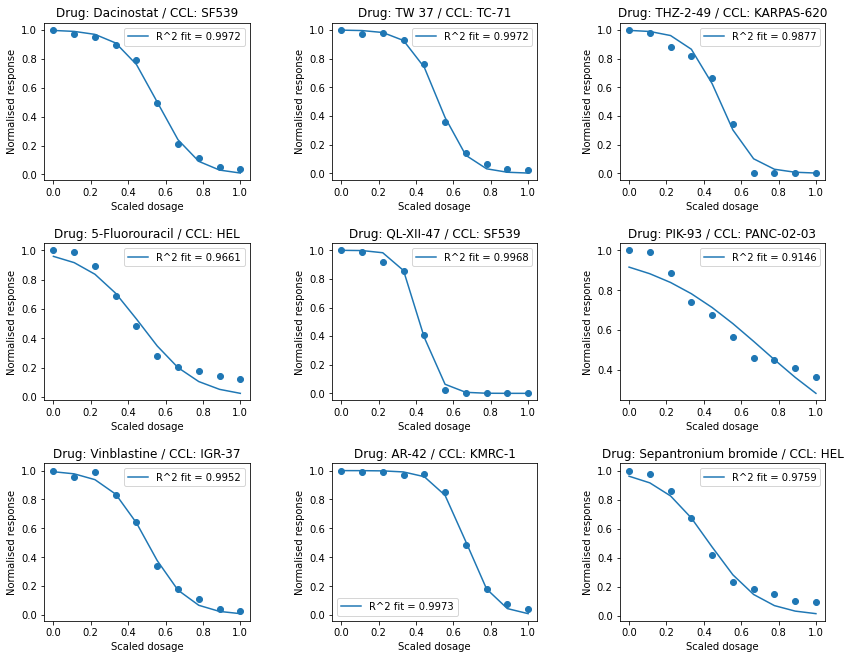

In [14]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 2565/2565 [00:02<00:00, 872.39it/s]


R2>0: (2565, 36)
R2>0.9 2545
CPU times: user 3.11 s, sys: 4.4 ms, total: 3.12 s
Wall time: 3.1 s


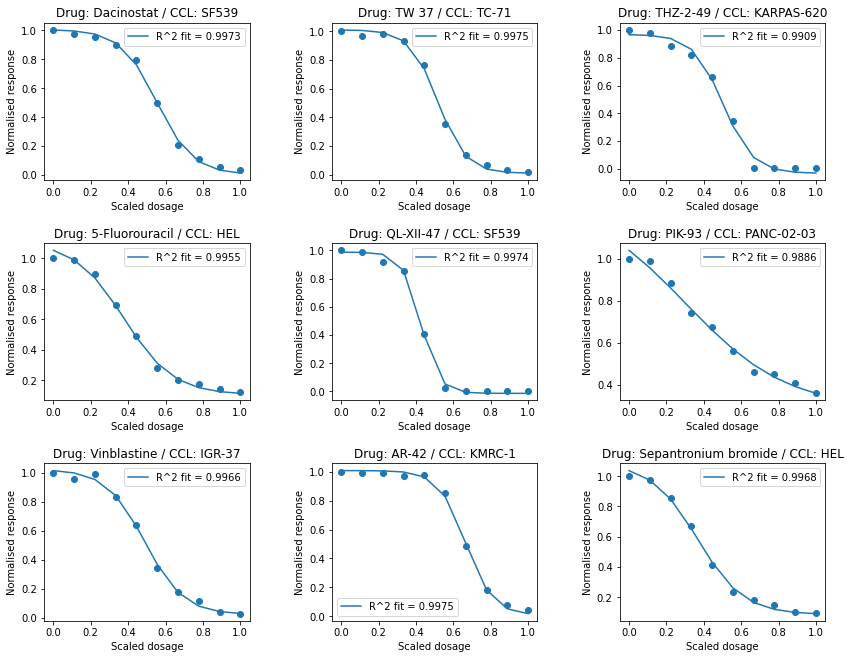

In [15]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 2565/2565 [00:02<00:00, 1205.26it/s]


(2565, 38)


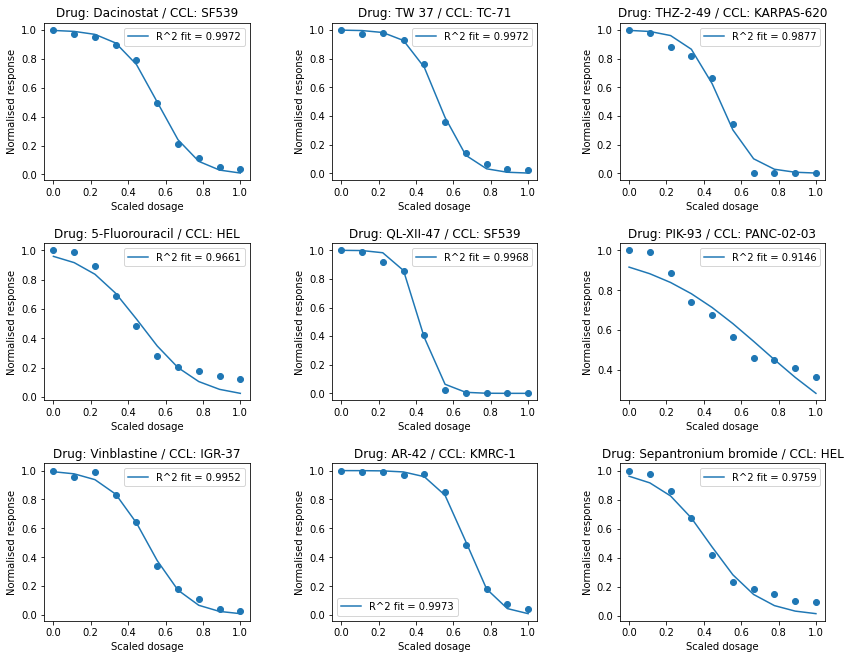

In [16]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 2565/2565 [00:03<00:00, 747.16it/s]


R2>0: (2565, 40)
R2>0.9 2563
CPU times: user 3.66 s, sys: 48.6 ms, total: 3.7 s
Wall time: 3.67 s


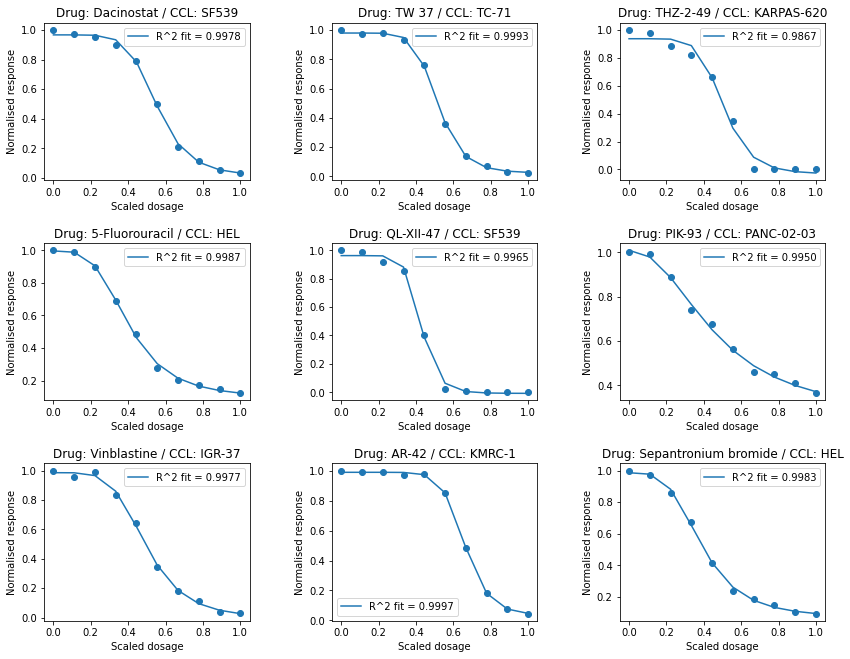

In [17]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [18]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[0.9668909093538484, 6.555826039740442, 0.5535...",0.997826
1,"[0.9791993754700737, 7.812659444790946, 0.5162...",0.999289
2,"[0.9373731930926237, 7.030753509796701, 0.5055...",0.986721
3,"[0.9961537173983349, 3.6766849671941055, 0.402...",0.998696
4,"[0.9625632201087942, 9.652316260267218, 0.4273...",0.996546
...,...,...
2595,"[0.9554984326423264, 4.254711613620585, 0.6144...",0.977509
2596,"[0.9661248040569321, 11.115923914533724, 0.325...",0.998861
2597,"[1.0164812447122176, 1.8281739272011586, 0.544...",0.990675
2598,"[0.9852255969635662, 3.202989455900043, 0.5272...",0.994144


### LL4_4_param

100%|██████████| 2565/2565 [00:04<00:00, 608.21it/s]


R2>0: (2565, 42)
R2>0.9 2563
CPU times: user 4.36 s, sys: 28.5 ms, total: 4.39 s
Wall time: 4.35 s


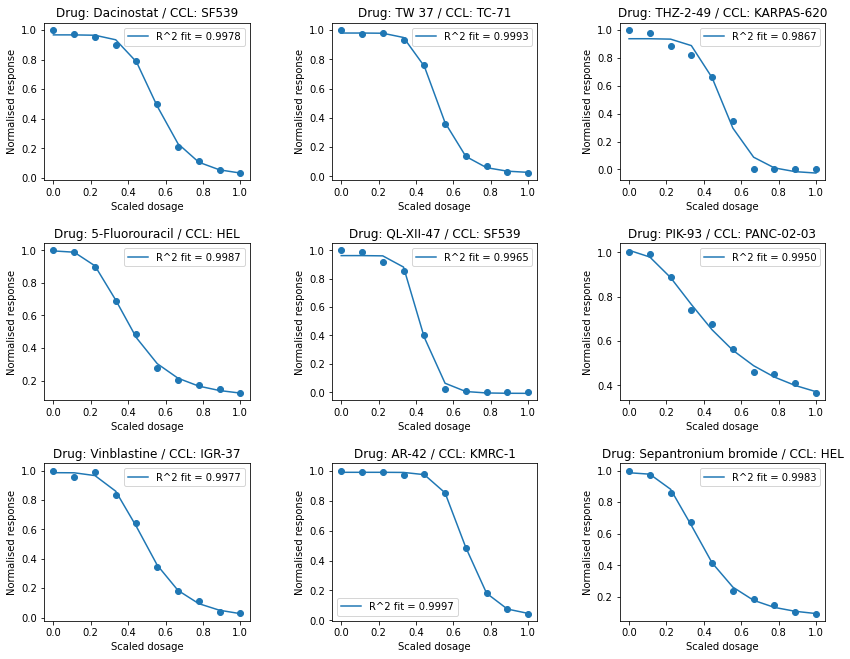

In [19]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 2565/2565 [00:04<00:00, 597.58it/s]


R2>0: (2552, 44)
R2>0.9 2552
CPU times: user 4.45 s, sys: 24.2 ms, total: 4.47 s
Wall time: 4.44 s


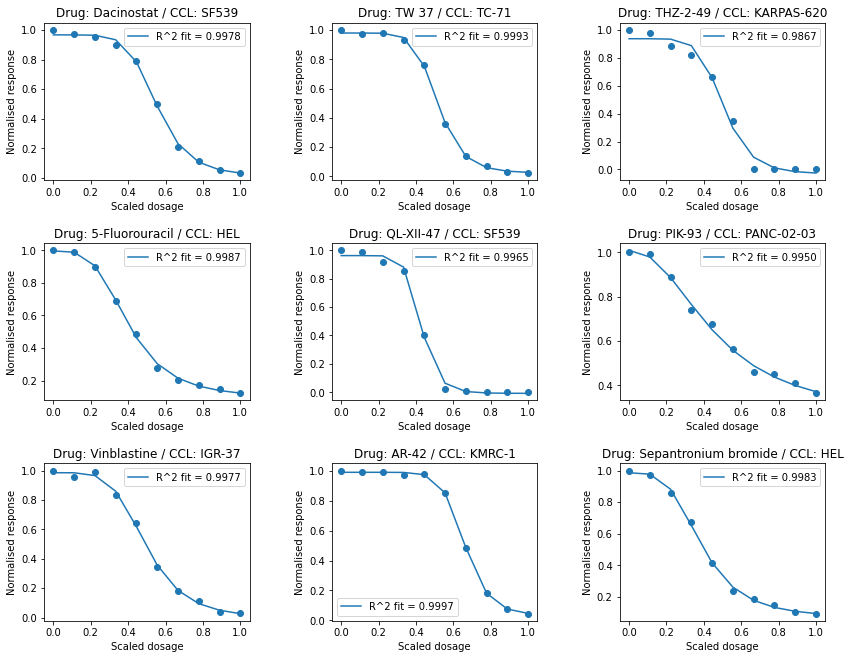

In [20]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 2552/2552 [00:03<00:00, 675.16it/s]


R2>0: (2552, 46)
R2>0.9 2549
CPU times: user 4.02 s, sys: 27.6 ms, total: 4.05 s
Wall time: 4.01 s


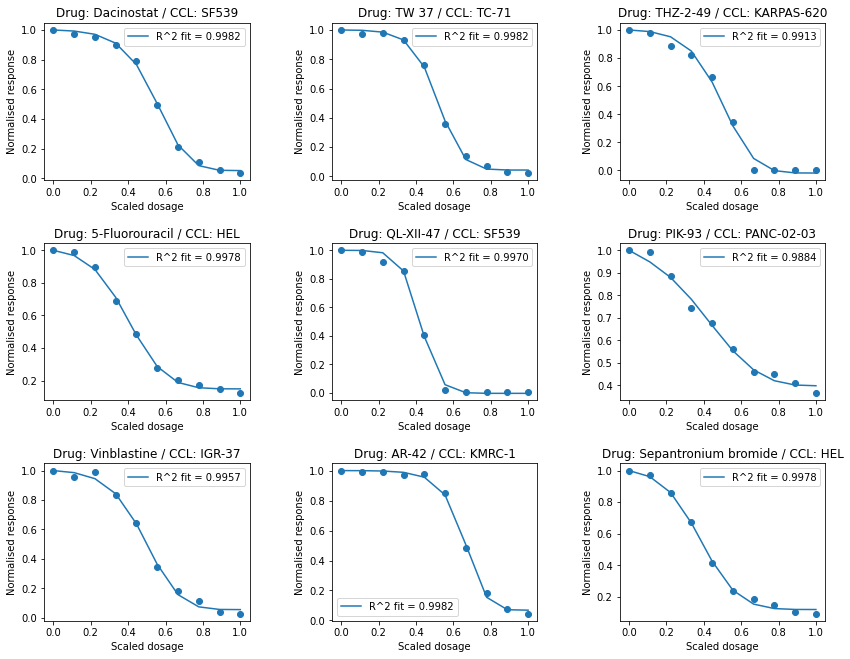

In [21]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [22]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [23]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,logistic_4_param_r2,sigmoid_4_param_r2,logLogist_3_param_r2,sigmoid_2_param_r2,ll4R_4_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,fsigmoid_r2,better_fitting
0,0.997826,0.998878,0.998213,0.997226,0.997826,0.997826,0.997298,0.997226,sigmoid_4_param
1,0.999289,0.999030,0.998192,0.997156,0.999289,0.999289,0.997530,0.997156,logistic_4_param
2,0.986721,0.991203,0.991331,0.987712,0.986721,0.986721,0.990930,0.987712,logLogist_3_param
3,0.998696,0.998571,0.997779,0.966058,0.998696,0.998696,0.995511,0.966058,ll4_4_param
4,0.996546,0.997950,0.997028,0.996784,0.996546,0.996546,0.997449,0.996784,sigmoid_4_param


In [24]:
df["better_fitting"].value_counts()

sigmoid_4_param      1067
logLogist_3_param     741
logistic_4_param      275
ll4R_4_param          238
ll4_4_param           231
Name: better_fitting, dtype: int64

In [25]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
sigmoid_4_param,2263
logistic_4_param,2245
ll4R_4_param,2245
ll4_4_param,2245
logLogist_3_param,2230
sigmoid_3_param,1820
sigmoid_2_param,1391
fsigmoid,1391


In [26]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,2528
ll4R_4_param,2528
ll4_4_param,2528
logLogist_3_param,2516
sigmoid_4_param,2502
sigmoid_3_param,2384
sigmoid_2_param,2000
fsigmoid,2000


In [27]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,2552
ll4R_4_param,2552
ll4_4_param,2552
logLogist_3_param,2549
sigmoid_3_param,2534
sigmoid_4_param,2523
sigmoid_2_param,2334
fsigmoid,2334


In [28]:
df.shape

(2552, 47)

In [29]:
df.to_csv("fit_1234.csv")